# preamble

In [25]:
# science-y
#import fbprophet
import math
import numpy as np
import numpy
import numpy.polynomial as np_poly
import pandas as pd
import pystan
import scipy as sp
import pymc3 as pm
import theano

#ml stuff
#import pandas_ml as pdml

In [26]:
import scipy.interpolate as sp_interpolate
import scipy.signal as sp_signal
import scipy.stats as sp_stats

In [27]:
# sklearn
import sklearn.discriminant_analysis as sk_disc
import sklearn.ensemble as sk_ensemble
import sklearn.linear_model as sk_lm
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing as sk_preprocess
from sklearn import svm as sk_svm
import sklearn.tree as sk_tree
from sklearn import utils as sk_utils
import sklearn.datasets as sk_datasets
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier

In [28]:
# spark stuff
try:
    from pyspark.sql import SQLContext
    from pyspark.sql import Row as SqlRow
    import pyspark.ml.classification as ml_cl
    import pyspark.ml.linalg as ml_linalg
    import pyspark.ml.regression as ml_reg
    import pyspark.ml.util as ml_util
    import pyspark.sql.functions as sql_f
    from pyspark.mllib.stat import Statistics as ml_stats
    from pyspark.ml.evaluation import RegressionEvaluator as ml_reg_eval
except ImportError:
    print('import error while loading spark, skipping')
    pass

import error while loading spark, skipping


In [29]:
# python stuff
import boto
from collections import OrderedDict
import copy
from datetime import datetime, timedelta
from datetime import date as dt_date
import functools as ft
from __future__ import print_function
import itertools
import json
import multiprocessing
import operator
import os
import pickle
from pprint import pprint
import re
import random
import string
import subprocess
import sys
import time
import tqdm

In [30]:
# viz
import daft
from graphviz import Digraph
import matplotlib
import matplotlib.colors as mpl_colors
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import mpld3
import pydotplus
import seaborn as sns

In [31]:
# widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets
#from IPython.html import widgets as html_widgets
from IPython.display import display as ipython_display
# from IPython.display import Math
# from IPython.display import Latex
from IPython.display import HTML as iHTML
from IPython.core.pylabtools import figsize as i_figsize

In [38]:
DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"
DIR_PPBM  = DIR_REPOS + '/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers'
DIR_OLA_DATA = DIR_HOME + "/ola-data"
fo_data = DIR_OLA_DATA + "/driver-churn/qubole"

In [33]:
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams["figure.figsize"] = [6,4]

matplotlib.rcParams.update(json.load(open(DIR_HOME+"/.matplotlib/matplotlibrc.json")))

np.set_printoptions(precision=2)

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('precision', 2)
pd.set_option('max_colwidth',20)

In [34]:
%matplotlib inline
%load_ext Cython
#mpld3.enable_notebook()

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [35]:
print(sys.version_info)
print(sys.version)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)
3.6.1 (default, Apr  4 2017, 09:36:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]


In [36]:
if 'sc' in locals():
    sc.setLogLevel("WARN")

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\Ceil}[1]{\left\lceil {#1} \right\rceil}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\Floor}[1]{\left\lfloor {#1} \right\rfloor}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\Recip}[1]{ \frac{1}{ #1 } }
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [37]:
iHTML("""
<style>
.cm-s-ipython span.cm-comment {color: #777777;}
.cm-s-ipython span.cm-string {color: #3e9448;}
.cm-s-ipython span.cm-string {color: #7f9f7f;}
.cm-s-ipython span.cm-string {color: #b0559e;}
.cm-s-ipython span.cm-variable {color: #666666;}
.cm-s-ipython span.cm-variable-2 {color: #6f42c1;}
.cm-keyword { color: #f0dfaf; font-weight: bold; }
.cm-s-ipython span.cm-operator {color: #a3685a;}
.cm-s-ipython span.cm-builtin {color: #7e4a15; font-weight: bold; }
</style>
""")

# core

Hello 

## hello

### voila

In [14]:
import pymc3 as pm

with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", parameter)

yMC3 is concerned with two types of programming variables: stochastic and deterministic.
stochastic variables are variables that are not deterministic, i.e., even if you knew all the values of the variables' parameters and components, it would still be random. Included in this category are instances of classes Poisson, DiscreteUniform, and Exponential.
deterministic variables are variables that are not random if the variables' parameters and components were known. This might be confusing at first: a quick mental check is if I knew all of variable foo's component variables, I could determine what foo's value is.


In [15]:
with pm.Model() as model_tmp:
    betas_tmp = pm.Beta("betas_tmp", 0, 1, shape=20)

In [16]:
betas_tmp.tag.test_value

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [44]:
idx = np.arange(5)
with pm.Model() as model_tmp:
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 5)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)
    lambda_ = pm.math.switch(tau>=idx, lambda_1, lambda_2)
    


```python
    def subtract(x, y):
        return x - y
    
    stochastic_1 = pm.Uniform("U_1", 0, 1)
    stochastic_2 = pm.Uniform("U_2", 0, 1)
    
    det_1 = pm.Deterministic("Delta", subtract(stochastic_1, stochastic_2))
```

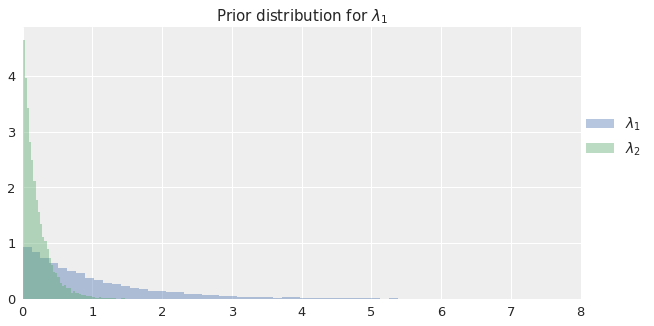

In [76]:
plt.rcParams['figure.figsize'] = [10,5]
samples = [lambda_1.random()[0] for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled", alpha=0.4, label='$\lambda_1$')
samples = [lambda_2.random()[0] for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled", alpha=0.4, label='$\lambda_2$')
plt.title("Prior distribution for $\lambda_1$")
plt.legend(loc=(1,0.5))
plt.xlim(0, 8)
plt.show()

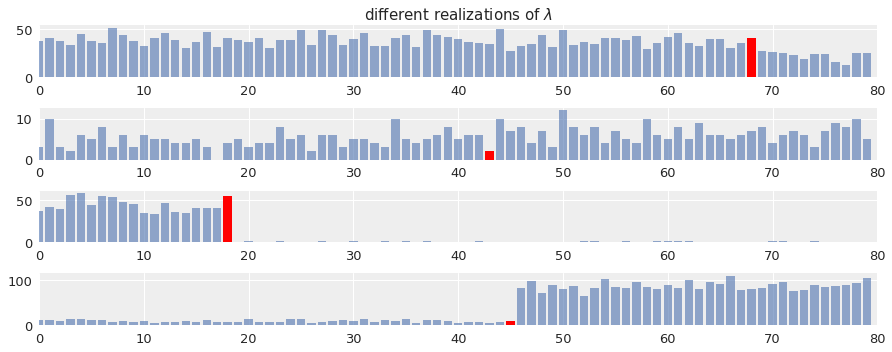

In [80]:
def plot_artificial_sms_dataset():
    tau = sp_stats.randint.rvs(0, 80) # switch point
    alpha = 1./20. # pmtr of exponential
    lambda_1, lambda_2 = sp_stats.expon.rvs(scale=1/alpha, size=2) # rvs from expo, for freq before and after
    data = np.r_[sp_stats.poisson.rvs(mu=lambda_1, size=tau), sp_stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
    plt.bar(np.arange(80), data, alpha=0.6)
    plt.bar(tau - 1, data[tau-1], color='r',label="user behaviour changed")
    plt.xlim(0, 80);

i_figsize(12.5, 5)
plt.title("More example of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()
    
plt.subplot(4,1,1); plt.title("Different realizations of $\lambda$")
plt.tight_layout()

## simulate site A purchases

In [106]:
#sns.set_palette(sns.color_palette("Set2", 10))
sns.set_palette(sns.color_palette("Set2", 10))

In [99]:
# sns.choose_colorbrewer_palette('qualitative')

/Users/dragon/Library/Python/3.6/lib/python/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
100%|██████████| 18000/18000 [00:03<00:00, 5212.46it/s]


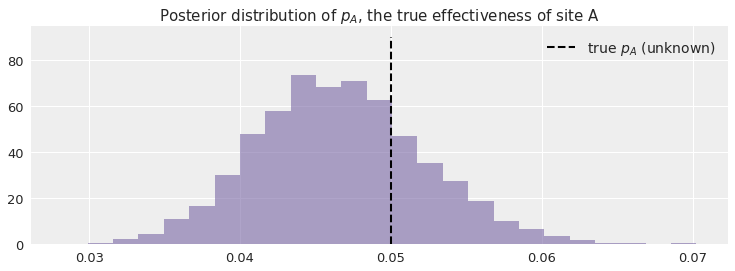

In [111]:
p_true,N = 0.05,1500
occurrences = sp_stats.bernoulli.rvs(p_true, size=N)
with pm.Model() as site_a_model:
    p_a = pm.Uniform('p_a', lower=0, upper=1)
    obs = pm.Bernoulli('obs', p_a, observed=occurrences)
    step = pm.Metropolis()
    trace = pm.sample(18000,step=step)
    burned_trace = trace[1000:]

i_figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(burned_trace["p_a"], bins=25, histtype="stepfilled", normed=True, color='#7A68A6', alpha=0.6)
plt.legend()
plt.show()

## simulate site A,B purchases

In [ ]:
true_p_A = 0.05
true_p_B = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

#generate some observations
observations_A = sp_stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = sp_stats.bernoulli.rvs(true_p_B, size=N_B)

note that in real world, observations_{A,B} wont be simulated. (Duh!)

In [ ]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model_a_b:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)

    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]
    
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

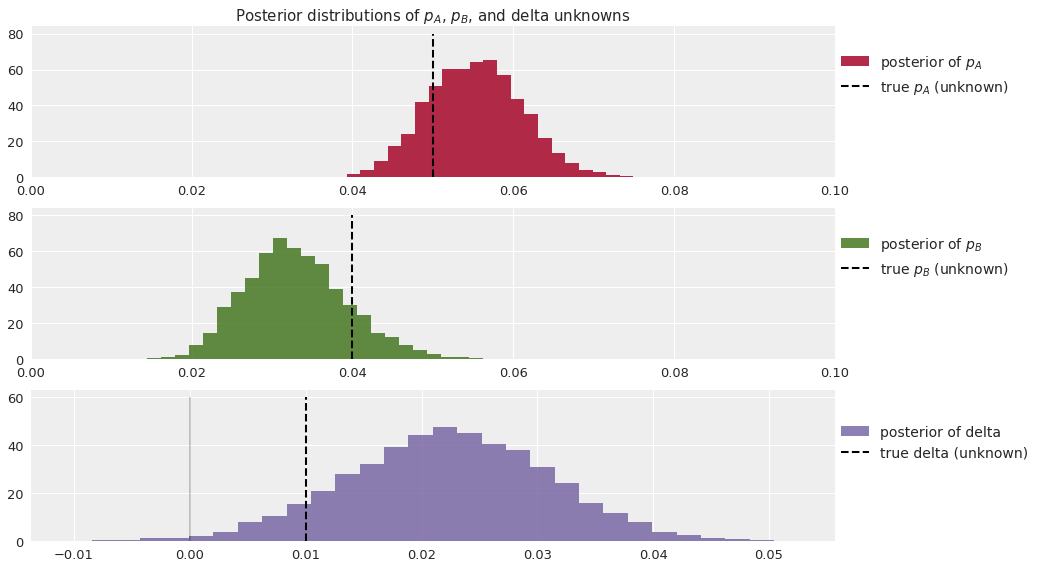

In [121]:
i_figsize(12,8)
ax = plt.subplot(311)
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc=(1,0.5))
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc=(1,0.5))

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc=(1,0.5))

plt.tight_layout()
plt.show()

## binomial

In [138]:
sp_stats.binom.pmf?

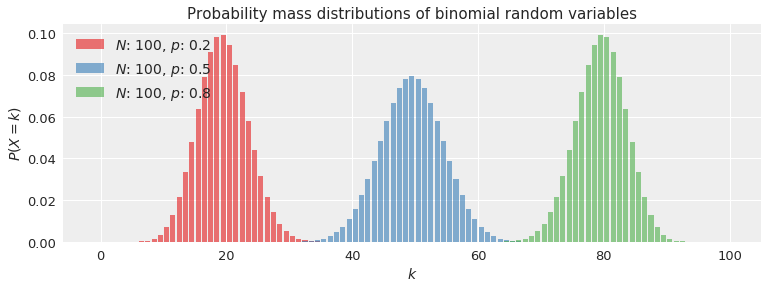

In [137]:
i_figsize(12.5, 4)
sns.set_palette(sns.color_palette("Set1", 10))
parameters = [(10, .2), (10,.5) , (10, .8)]
for i in range(len(parameters)):
    N, p = parameters[i]
    N = 100
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, sp_stats.binom.pmf(_x, N, p),
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p))

plt.legend(loc="upper left")
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

## Privacy Algorithm

In [17]:

N = 100
with pm.Model() as model_privacy:
    p = pm.Uniform("freq_cheating", 0, 1) # we know not, hence uniform
    # ground-truth
    true_answers      = pm.Bernoulli("truths",         p, shape=N, testval=np.random.binomial(1, 0.5, N))
    
    first_coin_flips  = pm.Bernoulli("first_flips",  0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
    second_coin_flips = pm.Bernoulli("second_flips", 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
    
    val = first_coin_flips*true_answers + (1 - first_coin_flips)*second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", theano.tensor.sum(val)/float(N))
    
    # lets say we observed 35 answers as yes
    observations = pm.Binomial("obs", N, observed_proportion, observed=35)
    
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(3000, step=step, njobs=multiprocessing.cpu_count()-1)
    burned_trace = trace[1500:]

/Users/dragon/Library/Python/3.6/lib/python/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/Users/dragon/Library/Python/3.6/lib/python/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/Users/dragon/Library/Python/3.6/lib/python/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its def

In [23]:
iHTML("""
<style>
.cm-s-ipython span.cm-comment {color: #777777;}
.cm-s-ipython span.cm-string {color: #3e9448;}
.cm-s-ipython span.cm-string {color: #7f9f7f;}
.cm-s-ipython span.cm-string {color: #b0559e;}
.cm-s-ipython span.cm-variable {color: #666666;}
.cm-s-ipython span.cm-variable-2 {color: #6f42c1;}
.cm-keyword { color: #f0dfaf; font-weight: bold; }
.cm-s-ipython span.cm-operator {color: #a3685a;}
.cm-s-ipython span.cm-builtin {color: #7e4a15; font-weight: bold; }
</style>
""")

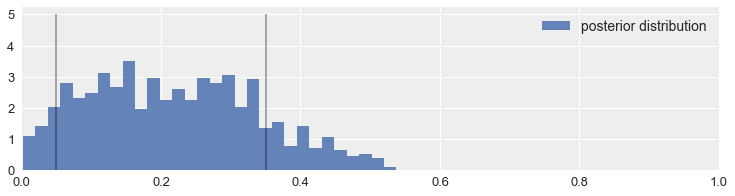

In [18]:
i_figsize(12.5, 3)
p_trace = burned_trace["freq_cheating"][1500:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, 
         label="posterior distribution")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.legend()
plt.show()

## challenger

In [40]:
DIR_PPBM

'/Users/dragon/repos/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers'

In [59]:
pd.read_csv?

In [65]:
with open(fi_chall) as f:
    print(f.readlines())

['Date,Temperature,Damage Incident\n', '04/12/1981,66,0\n', '11/12/1981,70,1\n', '3/22/82,69,0\n', '6/27/82,80,NA\n', '01/11/1982,68,0\n', '04/04/1983,67,0\n', '6/18/83,72,0\n', '8/30/83,73,0\n', '11/28/83,70,0\n', '02/03/1984,57,1\n', '04/06/1984,63,1\n', '8/30/84,70,1\n', '10/05/1984,78,0\n', '11/08/1984,67,0\n', '1/24/85,53,1\n', '04/12/1985,67,0\n', '4/29/85,75,0\n', '6/17/85,70,0\n', '7/29/85,81,0\n', '8/27/85,76,0\n', '10/03/1985,79,0\n', '10/30/85,75,1\n', '11/26/85,76,0\n', '01/12/1986,58,1\n', '1/28/86,31,Challenger Accident\n']


In [ ]:
def date_parser_1(x):
    try:
        return datetime.strptime(x,'%m/%d/%Y')
    except ValueError:
        return datetime.strptime(x,'%m/%d/%y')
    
fi_chall = (DIR_PPBM+'/Chapter2_MorePyMC/data/challenger_data.csv')
df_chall = pd.read_csv(fi_chall, 
                       dtype={'Date': str, 'Temperature': np.float32, 'Damage Incident': str},
                       parse_dates=['Date'], na_values='NA',
                       date_parser=date_parser_1
                      )

In [108]:
ixs_acc

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

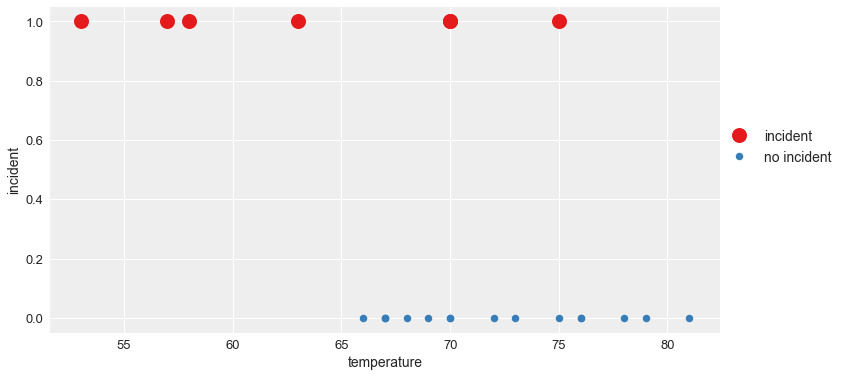

In [114]:
with sns.color_palette('Set1',10):
    i_figsize(12,6)
    vals = df_chall.loc[:23, ['Temperature','Damage Incident']].values
    ixs_acc = (vals[:,1]=='1')
    plt.plot(vals[ixs_acc,0], vals[ ixs_acc,1], 'o', markersize=15, label='incident')
    plt.plot(vals[~ixs_acc,0],vals[~ixs_acc,1], '.', markersize=15, label='no incident')
    plt.legend(loc=(1,0.5))
    plt.xlabel('temperature'); plt.ylabel('incident')
    plt.show()

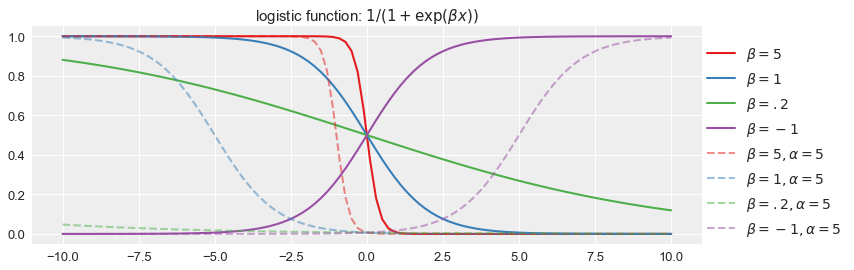

In [204]:
def logistic(x,beta,alpha=0): return 1./(1. + np.exp(beta*x + alpha))
with sns.color_palette('Set1',4):
    i_figsize(12,4)
    x = np.linspace(-10,10,100)
    plt.plot(x, logistic(x, 5),   label=r'$\beta= 5$')
    plt.plot(x, logistic(x, 1),   label=r'$\beta= 1$')
    plt.plot(x, logistic(x, 0.2), label=r'$\beta=.2$')
    plt.plot(x, logistic(x,-1),   label=r'$\beta=-1$')
    
    plt.plot(x, logistic(x, 5,  5),  '--', label=r'$\beta=5,  \alpha=5$', alpha=0.5)
    plt.plot(x, logistic(x, 1,  5),  '--', label=r'$\beta=1,  \alpha=5$', alpha=0.5)
    plt.plot(x, logistic(x, .2, 5),  '--', label=r'$\beta=.2, \alpha=5$', alpha=0.5)
    plt.plot(x, logistic(x, -1, 5),  '--', label=r'$\beta=-1, \alpha=5$', alpha=0.5)

    plt.legend(loc=(1,0))
    plt.title(r'logistic function: $1 / {(1 + \exp(\beta x))}$')
    plt.show()
    

In [184]:
df_chall['defect'] = (df_chall['Damage Incident'] == '1')*1
df_chall_cl = df_chall[(df_chall['Damage Incident']=='1') | (df_chall['Damage Incident']=='0')]
df_chall_cl.T

,0,1,2,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Date,1981-04-12 00:00:00,1981-11-12 00:00:00,1982-03-22 00:00:00,1982-01-11 00:00:00,1983-04-04 00:00:00,1983-06-18 00:00:00,1983-08-30 00:00:00,1983-11-28 00:00:00,1984-02-03 00:00:00,1984-04-06 00:00:00,...,1985-01-24 00:00:00,1985-04-12 00:00:00,1985-04-29 00:00:00,1985-06-17 00:00:00,1985-07-29 00:00:00,1985-08-27 00:00:00,1985-10-03 00:00:00,1985-10-30 00:00:00,1985-11-26 00:00:00,1986-01-12 00:00:00
Temperature,66.00,70.00,69.00,68.00,67.00,72.00,73.00,70.00,57.00,63.00,...,53.00,67.00,75.00,70.00,81.00,76.00,79.00,75.00,76.00,58.00
Damage Incident,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,1
damage,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,1
defect,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,1


In [230]:
temperatures = df_chall_cl['Temperature']
defects = df_chall_cl['defect']
with pm.Model() as mdl_chall:
    beta  = pm.Normal('beta' , mu=0, tau=.001, testval=0)
    alpha = pm.Normal('alpha', mu=0, tau=.001, testval=0)
    p_d = pm.Deterministic('p_d', 1./(1.+theano.tensor.exp(beta*temperatures+alpha)))
    observed = pm.Bernoulli('observed', p_d, observed=defects)
    
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(120000, step=step, start=start, njobs=multiprocessing.cpu_count()-1)
    burned_trace = trace[100000::2]

/Users/dragon/Library/Python/3.6/lib/python/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Optimization terminated successfully.
         Current function value: 19.010705
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17


100%|██████████| 120000/120000 [00:53<00:00, 2256.77it/s]


In [231]:
alpha_samples = burned_trace['alpha'][:,None]
beta_samples  = burned_trace['beta'][:, None]

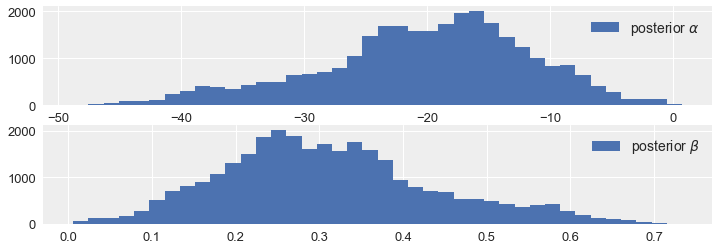

In [232]:
fig,axes=plt.subplots(2)
axes[0].hist(alpha_samples, bins=40, histtype='stepfilled',label=r'posterior $\alpha$')
axes[0].legend()

axes[1].hist(beta_samples, bins=40, label=r'posterior $\beta$')
axes[1].legend();

In [233]:
t = np.linspace(temperatures.min()-5,temperatures.max()+5,100)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)
p_t_mean = p_t.mean(axis=0)
p_t_sd = p_t.std(axis=0)

print(t.shape, beta_samples.shape, alpha_samples.shape, p_t.shape, p_t_mean.shape, p_t_sd.shape)

(100, 1) (30000, 1) (30000, 1) (30000, 100) (100,) (100,)


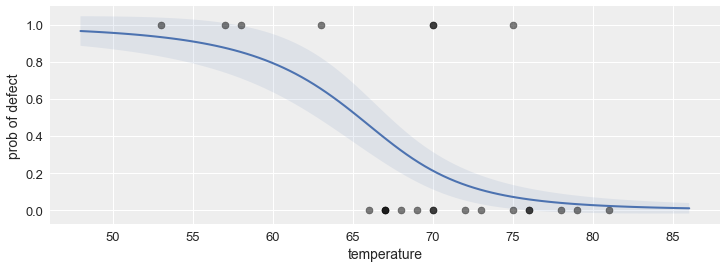

In [237]:
plt.plot(t, p_t_mean)
# plt.plot(t, p_t_mean+p_t_sd)
# plt.plot(t, p_t_mean-p_t_sd)
plt.fill_between(t.ravel(), (p_t_mean-p_t_sd).ravel(), (p_t_mean+p_t_sd).ravel(), alpha=0.1)
plt.xlabel('temperature')
plt.ylabel('prob of defect')
plt.scatter(temperatures, defects, color="k", s=50, alpha=0.5)
plt.show()

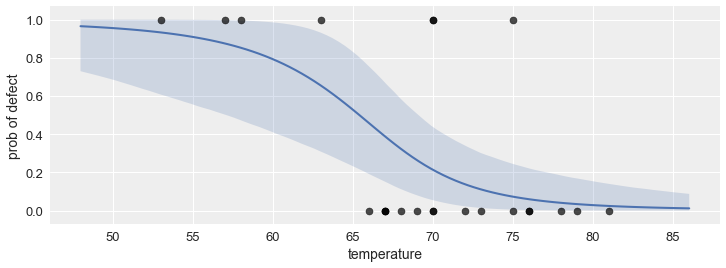

In [242]:
plt.plot(t, p_t_mean)
qs = sp_stats.mstats.mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t.ravel(), *qs, alpha=0.2)
plt.xlabel('temperature')
plt.ylabel('prob of defect')
plt.scatter(temperatures, defects, color="k", s=50, alpha=0.7)
plt.show()


In [243]:
df_chall.iloc[-1,:]

Date               1986-01-28 00:00:00
Temperature                      31.00
Damage Incident    Challenger Accident
damage                               0
defect                               0
Name: 24, dtype: object

on the day of the accident, the temperature was 31.0 

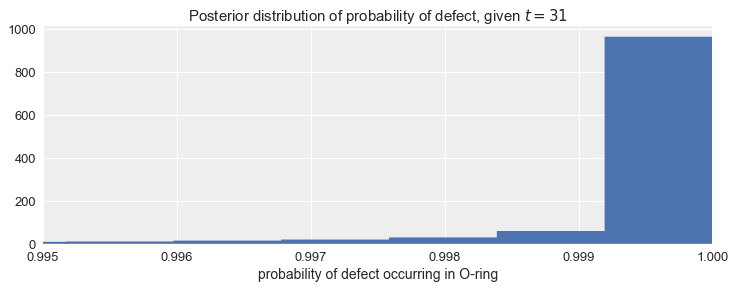

In [244]:
temp_today = 31
prob_today = logistic(temp_today, beta_samples, alpha_samples)

plt.xlim(0.995, 1)
plt.hist(prob_today, bins=1000, normed=True, histtype='stepfilled')
plt.title("Posterior distribution of probability of defect, given $t = 31$")
plt.xlabel("probability of defect occurring in O-ring");

## what are these seperation plots??

# scratch

## daft tmp

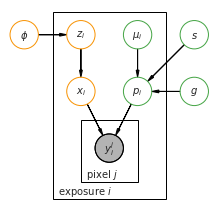

In [56]:
plt.rcParams['figure.figsize'] = [10,6]
p_color = {"ec": "#46a546"}; s_color = {"ec": "#f89406"}
pgm = daft.PGM([3.6, 3.5], origin=[0.7, 0])

n = daft.Node("phi", r"$\phi$", 1, 3, plot_params=s_color)
n.va = "baseline"
pgm.add_node(n)
pgm.add_node(daft.Node("speckle_coeff", r"$z_i$", 2, 3, plot_params=s_color))
pgm.add_node(daft.Node("speckle_img", r"$x_i$", 2, 2, plot_params=s_color))

pgm.add_node(daft.Node("spec", r"$s$", 4, 3, plot_params=p_color))
pgm.add_node(daft.Node("shape", r"$g$", 4, 2, plot_params=p_color))
pgm.add_node(daft.Node("planet_pos", r"$\mu_i$", 3, 3, plot_params=p_color))
pgm.add_node(daft.Node("planet_img", r"$p_i$", 3, 2, plot_params=p_color))

pgm.add_node(daft.Node("pixels", r"$y_i ^j$", 2.5, 1, observed=True))

# Edges.
pgm.add_edge("phi", "speckle_coeff")
pgm.add_edge("speckle_coeff", "speckle_img")
pgm.add_edge("speckle_img", "pixels")

pgm.add_edge("spec", "planet_img")
pgm.add_edge("shape", "planet_img")
pgm.add_edge("planet_pos", "planet_img")
pgm.add_edge("planet_img", "pixels")

# And a plate.
pgm.add_plate(daft.Plate([1.5, 0.2, 2, 3.2], label=r"exposure $i$",
    shift=-0.1))
pgm.add_plate(daft.Plate([2, 0.5, 1, 1], label=r"pixel $j$",
    shift=-0.1))

# Render and save.
pgm.render()
plt.show()

'/Users/dragon/.matplotlib'